In [2]:
%pip install numpy 
%pip install matplotlib 


Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 25.2 -> 25.3
[notice] To update, run: python.exe -m pip install --upgrade pip


Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 25.2 -> 25.3
[notice] To update, run: python.exe -m pip install --upgrade pip


In [3]:
import numpy as np
import matplotlib.pyplot as mplt


## Linear Regression to Model Stellar Luminosity vs Mass

- **Method used**: Linear Regression
- **Key variables**:

    M: stellar mass (in solar mass units) \
    L: stellar luminosity (in solar luminosity units)

## Dataset

In [4]:
M = np.array([0.6, 0.8, 1.0, 1.2, 1.4, 1.6, 1.8, 2.0, 2.2, 2.4])
L = np.array([0.15, 0.35, 1.00, 2.30, 4.10, 7.00, 11.2, 17.5, 25.0, 35.0])

x = M  
y = L  

print(f"Dataset: {len(x)} samples")
print(f"M (mass): {x}")
print(f"L (luminosity): {y}")

Dataset: 10 samples
M (mass): [0.6 0.8 1.  1.2 1.4 1.6 1.8 2.  2.2 2.4]
L (luminosity): [ 0.15  0.35  1.    2.3   4.1   7.   11.2  17.5  25.   35.  ]


## Dataset visualization

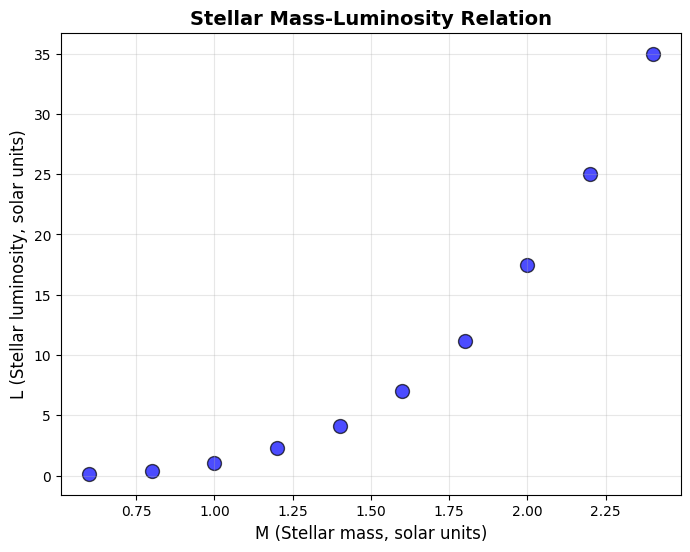

In [5]:
mplt.figure(figsize=(8, 6))
mplt.scatter(M, L, s=100, alpha=0.7, color='blue', edgecolors='black')
mplt.xlabel("M (Stellar mass, solar units)", fontsize=12)
mplt.ylabel("L (Stellar luminosity, solar units)", fontsize=12)
mplt.title("Stellar Mass-Luminosity Relation", fontsize=14, fontweight='bold')
mplt.grid(True, alpha=0.3)
mplt.show()



## Linearity Analysis

**Observations:**
- We clearly see curvature (relationship is **not** linear)
- Luminosity increases **faster** than proportionally with mass
- This suggests an exponential or power-law relationship

## Linear Regression Model

**Model:** L = w·M + b

- **w**: slope (weight)
- **b**: bias (intercept)

In [6]:

def predict(x_list, w, b):
    return w * x_list + b

def compute_cost(x_list, y_list, w, b):

    m_local = len(x_list)
    total = 0.0
    for i in range(m_local):
        f_wb = w * x_list[i] + b  
        diff = f_wb - y_list[i]    
        total += diff * diff
    cost = total / (2 * m_local)
    return cost

def compute_mse(x_list, y_list, w, b):
    m_local = len(x_list)
    total = 0.0
    for i in range(m_local):
        f_wb = w * x_list[i] + b
        diff = f_wb - y_list[i]
        total += diff * diff
    mse = total / m_local
    return mse

w_test = 0.0
b_test = 0.0

print("Model and cost test:")
print(f"Cost J(w,b) with w={w_test}, b={b_test}: {compute_cost(x, y, w_test, b_test):.4f}")
print(f"MSE with w={w_test}, b={b_test}: {compute_mse(x, y, w_test, b_test):.4f}")


Model and cost test:
Cost J(w,b) with w=0.0, b=0.0: 117.6967
MSE with w=0.0, b=0.0: 235.3935


Minimum of J(w,b):
  w = 14.2373
  b = -10.0000
  J(w,b) = 12.7918


C:\Users\sasup\AppData\Local\Temp\ipykernel_2848\1997863950.py:33: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  ax1.legend()


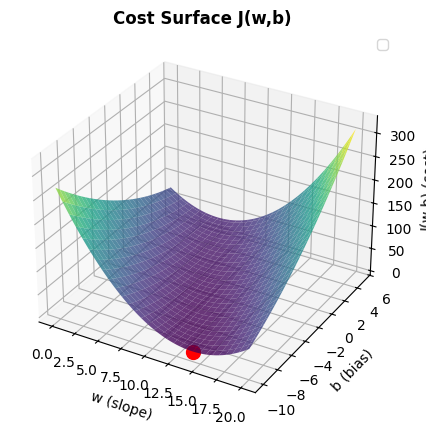

In [7]:

from mpl_toolkits.mplot3d import Axes3D  
from matplotlib import cm

w_values = np.linspace(0.0, 20.0, 60)
b_values = np.linspace(-10.0, 5.0, 60)

W, B = np.meshgrid(w_values, b_values)
J_vals = np.zeros_like(W)

for i in range(len(b_values)):
    for j in range(len(w_values)):
        J_vals[i, j] = compute_cost(x, y, W[i, j], B[i, j])

min_idx = np.unravel_index(np.argmin(J_vals), J_vals.shape)
w_min = W[min_idx]
b_min = B[min_idx]
J_min = J_vals[min_idx]

print("Minimum of J(w,b):")
print(f"  w = {w_min:.4f}")
print(f"  b = {b_min:.4f}")
print(f"  J(w,b) = {J_min:.4f}")

fig = mplt.figure(figsize=(12, 5))

ax1 = fig.add_subplot(121, projection="3d")
surf = ax1.plot_surface(W, B, J_vals, cmap=cm.viridis, alpha=0.8, linewidth=0, antialiased=True)
ax1.scatter([w_min], [b_min], [J_min], color='red', s=100)
ax1.set_xlabel("w (slope)", fontsize=10)
ax1.set_ylabel("b (bias)", fontsize=10)
ax1.set_zlabel("J(w,b) (cost)", fontsize=10)
ax1.set_title("Cost Surface J(w,b)", fontsize=12, fontweight='bold')
ax1.legend()

mplt.show()




## Analysis of the Minimum

- The minimum of J(w,b) gives the optimal values of w and b that minimize
- The mean squared error between model predictions and the true data
- At this point, the model L = w·M + b best fits the observed data

In [8]:

def compute_gradients(x_list, y_list, w, b):
    m_local = len(x_list)
    sum_dw = 0.0
    sum_db = 0.0

    for i in range(m_local):
        f_wb = w * x_list[i] + b  
        error = f_wb - y_list[i]   
        sum_dw += error * x_list[i]
        sum_db += error

    dj_dw = sum_dw / m_local
    dj_db = sum_db / m_local
    return dj_dw, dj_db

dj_dw_test, dj_db_test = compute_gradients(x, y, w_test, b_test)
print(f"Gradients at w={w_test}, b={b_test}:")
print(f"  dJ/dw = {dj_dw_test:.4f}")
print(f"  dJ/db = {dj_db_test:.4f}")


Gradients at w=0.0, b=0.0:
  dJ/dw = -21.5230
  dJ/db = -10.3600


In [9]:

def gradient_descent(x_list, y_list, w_init, b_init, alpha, num_iterations):

    w = w_init
    b = b_init
    history_iterations = []
    history_costs = []

    for i in range(num_iterations):
        dj_dw, dj_db = compute_gradients(x_list, y_list, w, b)
        w = w - alpha * dj_dw
        b = b - alpha * dj_db

        cost = compute_cost(x_list, y_list, w, b)
        history_iterations.append(i)
        history_costs.append(cost)


    return w, b, history_iterations, history_costs

print("Non-vectorized gradient descent")
alpha = 0.01
num_iterations = 1000
w_init = 1.0
b_init = 1.0

w_learned_nonvec, b_learned_nonvec, it_hist_nonvec, cost_hist_nonvec = gradient_descent(
    x, y, w_init, b_init, alpha, num_iterations)
print("\nLearned parameters (non-vectorized):")
print(f"w = {w_learned_nonvec:.4f}")
print(f"b = {b_learned_nonvec:.4f}")
print(f"Final cost: {cost_hist_nonvec[-1]:.4f}")


Non-vectorized gradient descent

Learned parameters (non-vectorized):
w = 13.2967
b = -8.8268
Final cost: 13.9376


## Vectorization

Vectorization lets us express mathematical operations on vectors **without explicit Python loops**.
NumPy implements these operations in optimized C code, which makes them faster and the code cleaner and more readable.

In [10]:
def compute_gradients_vectorized(x_array, y_array, w, b):

    m = len(x_array)
    
    f_wb = w * x_array + b
    
    errors = f_wb - y_array
    
    dj_dw = np.sum(errors * x_array) / m
    dj_db = np.sum(errors) / m
    
    return dj_dw, dj_db

def gradient_descent_vectorized(x_array, y_array, w_init, b_init, alpha, num_iterations):
   
    w = w_init
    b = b_init
    history_iterations = []
    history_costs = []

    for i in range(num_iterations):
        dj_dw, dj_db = compute_gradients_vectorized(x_array, y_array, w, b)
        w = w - alpha * dj_dw
        b = b - alpha * dj_db

        cost = compute_cost(x_array, y_array, w, b)
        history_iterations.append(i)
        history_costs.append(cost)

       
    return w, b, history_iterations, history_costs

print("\nVectorized gradient descent")
w_learned_vec, b_learned_vec, it_hist_vec, cost_hist_vec = gradient_descent_vectorized(
    x, y, w_init, b_init, alpha, num_iterations)
print("\nLearned parameters (vectorized):")
print(f"w = {w_learned_vec:.4f}")
print(f"b = {b_learned_vec:.4f}")
print(f"Final cost: {cost_hist_vec[-1]:.4f}")

print("\nVerification (difference between non-vectorized and vectorized):")
print(f"  |w| = {abs(w_learned_nonvec - w_learned_vec):.10f}")
print(f"  |b| = {abs(b_learned_nonvec - b_learned_vec):.10f}")



Vectorized gradient descent

Learned parameters (vectorized):
w = 13.2967
b = -8.8268
Final cost: 13.9376

Verification (difference between non-vectorized and vectorized):
  |w| = 0.0000000000
  |b| = 0.0000000000


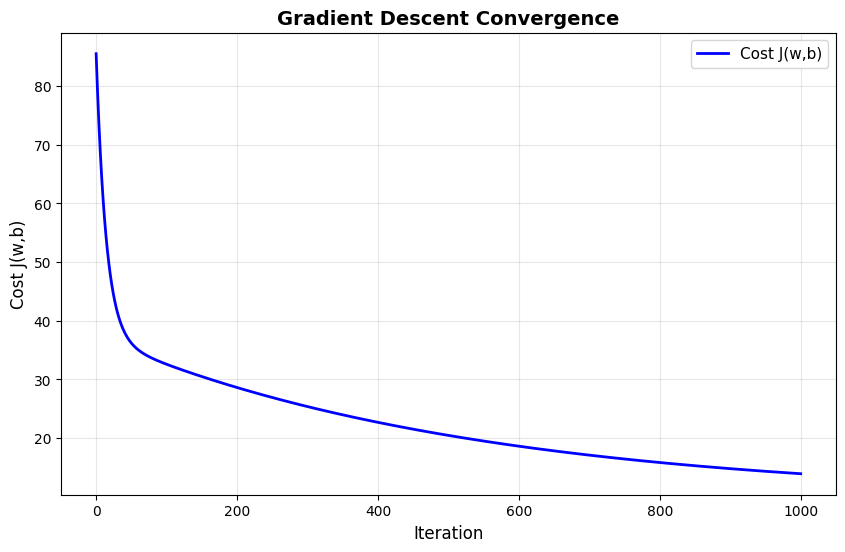

Analysis:
- Total iterations: 1000
- Initial cost: 85.5063
- Final cost: 13.9376


In [11]:
mplt.figure(figsize=(10, 6))
mplt.plot(it_hist_vec, cost_hist_vec, 'b-', linewidth=2, label='Cost J(w,b)')
mplt.xlabel("Iteration", fontsize=12)
mplt.ylabel("Cost J(w,b)", fontsize=12)
mplt.title("Gradient Descent Convergence", fontsize=14, fontweight='bold')
mplt.grid(True, alpha=0.3)
mplt.legend(fontsize=11)
mplt.show()

print("Analysis:")
print(f"- Total iterations: {num_iterations}")
print(f"- Initial cost: {cost_hist_vec[0]:.4f}")
print(f"- Final cost: {cost_hist_vec[-1]:.4f}")


## Analysis

- The model started far from optimal (initial cost around 85)
- The error decreased significantly (final cost ~14), but the cost is still relatively high, which suggests the linear model does not perfectly fit the data
- Since the cost decreases monotonically with iterations, we can conclude that gradient descent is working correctly

Summary
α          w            b            Final Cost     
------------------------------------------------------------
0.001      6.6500       1.8647       32.6364        
0.010      13.2967      -8.8268      13.9376        
0.100      18.1294      -16.8339     9.7951         


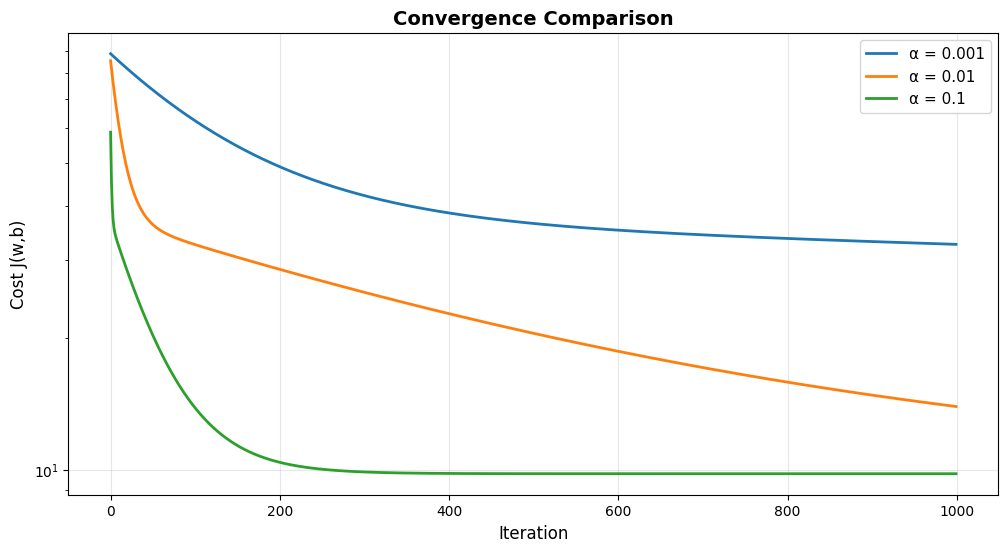

In [12]:
learning_rates = [0.001, 0.01, 0.1]
num_iterations_exp = 1000
w_init_exp = 1.0
b_init_exp = 1.0

results = []


for alpha_exp in learning_rates:
    w_exp, b_exp, it_exp, cost_exp = gradient_descent_vectorized(
        x, y, w_init_exp, b_init_exp, alpha_exp, num_iterations_exp)
    
    results.append({
        'alpha': alpha_exp,
        'w': w_exp,
        'b': b_exp,
        'final_cost': cost_exp[-1],
        'iterations': it_exp,
        'costs': cost_exp
    })
    
   
print("Summary")
print("="*60)
print(f"{'α':<10} {'w':<12} {'b':<12} {'Final Cost':<15}")
print("-"*60)
for r in results:
    print(f"{r['alpha']:<10.3f} {r['w']:<12.4f} {r['b']:<12.4f} {r['final_cost']:<15.4f}")
print("="*60)

mplt.figure(figsize=(12, 6))
for r in results:
    mplt.plot(r['iterations'], r['costs'], linewidth=2, 
              label=f'α = {r["alpha"]}')
mplt.xlabel("Iteration", fontsize=12)
mplt.ylabel("Cost J(w,b)", fontsize=12)
mplt.title("Convergence Comparison", 
           fontsize=14, fontweight='bold')
mplt.grid(True, alpha=0.3)
mplt.legend(fontsize=11)
mplt.yscale('log')
mplt.show()


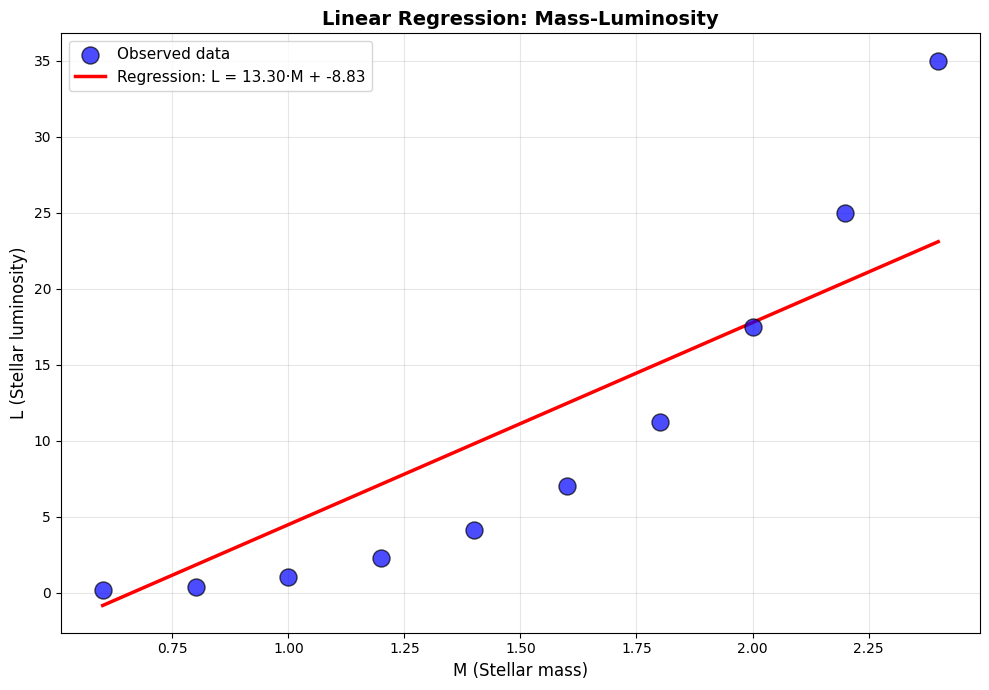

In [13]:

best_result = results[1]  
w_final = best_result['w']
b_final = best_result['b']

M_line = np.linspace(min(M), max(M), 100)
L_pred = predict(M_line, w_final, b_final)

mplt.figure(figsize=(10, 7))
mplt.scatter(M, L, s=150, alpha=0.7, color='blue', edgecolors='black', 
             label='Observed data', zorder=3)
mplt.plot(M_line, L_pred, 'r-', linewidth=2.5, label=f'Regression: L = {w_final:.2f}·M + {b_final:.2f}', zorder=2)
mplt.xlabel("M (Stellar mass)", fontsize=12)
mplt.ylabel("L (Stellar luminosity)", fontsize=12)
mplt.title("Linear Regression: Mass-Luminosity", fontsize=14, fontweight='bold')
mplt.grid(True, alpha=0.3)
mplt.legend(fontsize=11, loc='upper left')
mplt.tight_layout()
mplt.show()




## Conceptual Questions

### 1. Astrophysical meaning of w

The parameter **w** in the model L = w·M + b represents:

- **The rate of change of luminosity with respect to mass**: how much luminosity increases for each unit increase in stellar mass.

- **In real astrophysics**: The stellar mass–luminosity relation roughly follows a power law **L ∝ M^α**, with α ≈ 3.5 for main-sequence stars. This means luminosity increases much faster than mass.

### 2. Why is a linear model limited here?

The linear model **L = w·M + b** is limited because:

1. **The true relationship is non-linear**: The data clearly show curvature. Luminosity increases faster than mass, following an exponential/power-law–like behavior.

2. **Limited range of validity**: A linear model can approximate the relation well only over a small range of masses, but it fails when extrapolating outside that range.

